In [111]:
import pandas as pd
import numpy as np


In [112]:
data=pd.read_csv(r"E:\Jupyter_notebooks\data\rankingcard.csv",index_col=0)

In [113]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [115]:
#去掉重复值
data.drop_duplicates(inplace=True)
#回复索引
data.index=range(data.shape[0])

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [117]:
#查看空值
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [118]:
#使用均值填补家人人数缺失值
data["NumberOfDependents"].fillna(data["NumberOfDependents"].mean(),inplace=True)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [120]:
#使用随机森林填补收入缺失值
def fill_missing(X,y,to_fill):
    df=X.copy()
    fill=df.loc[:,to_fill]
    df=pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)
       
    #找出训练集和测试集
    Ytrain=fill[fill.notnull()]
    Ytest=fill[fill.isnull()]
    Xtrain=df.iloc[Ytrain.index,:]
    Xtest=df.iloc[Ytest.index,:]    
       
    #使用随机森林回归
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr=rfr(n_estimators=100).fit(Xtrain,Ytrain)
    Ypredict=rfr.predict(Xtest)

    return Ypredict


In [121]:
#填补收入缺失值
X=data.iloc[:,1:]
y=data["SeriousDlqin2yrs"]

y_pred=fill_missing(X,y,"MonthlyIncome")


In [122]:
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] =y_pred

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [124]:
#处理异常值
#查看异常值
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.410455,13243.504617,0.0,0.0,0.180000,1800.000000,4431.000000,7416.000000,10800.000000,23200.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [125]:
#年龄有异常值0
(data["age"]==0).sum()

1

In [126]:
#只有一条记录年龄为0直接删除
data=data[data["age"]!=0]

In [127]:
#在两年内逾期90天内的次数超过90次的记录,标签并不都是1，他们并不都是坏客户。
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count
#将违约次数大于90天的删除
data=data[data.loc[:,"NumberOfTimes90DaysLate"]<90]

In [128]:
#回复索引
data.index=range(data.shape[0])

In [129]:
#样本不平衡问题
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [130]:
#使用上采样方法来平衡样本
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)#实例化
X,y=sm.fit_resample(X,y)#返回已经上采样完毕过后的特征矩阵和标签

n=X.shape[0]#样本数量
X.shape
y.shape

n1=pd.Series(y).value_counts()[1]#标签为1的样本数量
n0=pd.Series(y).value_counts()[0]#标签为2的样本数量

print(n1/n,n0/n)

0.5 0.5


In [131]:
#分训练集和测试集
from sklearn.model_selection import train_test_split
X=pd.DataFrame(X)
y=pd.DataFrame(y)
Xtrain,Xvali,Ytrain,Yvali=train_test_split(X,y,test_size=0.3,random_state=420)

model_data=pd.concat([Ytrain,Xtrain],axis=1)
model_data
model_data.index=range(model_data.shape[0])#重新设置索引
model_data

vali_data=pd.concat([Xvali,Yvali],axis=1)
vali_data.index=range(vali_data.shape[0])


In [132]:
#保存需训练集和测试集
model_data.to_csv(r"E:\Jupyter_notebooks\data\model_data")
vali_data.to_csv(r"E:\Jupyter_notebooks\data\vali_data")

In [133]:
#分箱

## 分箱步骤
1）我们首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组

2）确保每一组中都要包含两种类别的样本，否则IV值会无法计算

3）我们对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止

4）我们让一个特征分别分成[2,3,4.....20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数

5）分箱完毕后，我们计算每个箱的WOE值，bad值 ，观察分箱效果

这些步骤都完成后，我们可以对各个特征都进行分箱，然后观察每个特征的IV值，以此来挑选特征


In [134]:
#按照等频对需要分箱的列进行分箱
#以”age“为例子
# model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)

pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化

只能够处理一维数据。返回箱子的上限和下限

参数q：要分箱的个数

参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子Series

现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限

In [135]:
# # 统计每个分箱中0和1的数量
# # 这里使用了数据透视表的功能groupby
# count_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
# count_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [136]:
# #num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
# num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]
# #注意zip会按照最短列来进行结合
# num_bins

In [137]:
# #计算WOE和BAD RATE
# #BAD RATE与bad%不是一个东西
# #BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
# #而bad%是一个箱中的坏样本占整个特征中的坏样本的比例

# columns=["min","max","count_0","count_1"]
# df=pd.DataFrame(num_bins,columns=columns)
# df.head()

In [138]:
# df["total"]=df.count_0+df.count_1#一个箱子中的所有样本数
# df["percentage"]=df.total/df.total.sum()#一个箱子中的样本数，占所有样本数的比例
# df["bad_rate"]=df.count_1/df.total#一个箱子中的坏客户的占所有样本数的比例
# df["good%"]=df.count_0/df.count_0.sum()#一个箱子中的好客户占所有好客户的比例
# df["bad%"]=df.count_1/df.count_1.sum()#一个箱子中的坏客户占所有好客户的比例
# df["woe"]=np.log(df["good%"]/df["bad%"])#每个箱子的woe值WOE是对一个箱子来说的，WOE越大，代表了这个箱子里的优质客户越多

In [139]:
# #计算IV值
# rate=df["good%"]-df["bad%"]
# iv_age=np.sum(rate*df.woe)

In [140]:
# iv_age

In [141]:
# #把上面的计算封装成函数
# def get_woe(num_bins):
#     # 通过 num_bins 数据计算 woe
#     columns = ["min","max","count_0","count_1"]
#     df=pd.DataFrame(num_bins,columns=columns)
#     df["total"]=df.count_0+df.count_1#一个箱子中的所有样本数
#     df["percentage"]=df.total/df.total.sum()#一个箱子中的样本数，占所有样本数的比例
#     df["bad_rate"]=df.count_1/df.total#一个箱子中的坏客户的占所有样本数的比例
#     df["good%"]=df.count_0/df.count_0.sum()#一个箱子中的好客户占所有好客户的比例
#     df["bad%"]=df.count_1/df.count_1.sum()#一个箱子中的坏客户占所有好客户的比例
#     df["woe"]=np.log(df["good%"]/df["bad%"])#每个箱子的woe值WOE是对一个箱子来说的，WOE越大，代表了这个箱子里的优质客户越多
#     return df

# def get_IV(df):
#     rate=df["good%"]-df["bad%"]
#     iv=np.sum(rate*df.woe)
#     return iv

In [142]:
# #卡方检验
# num_bins_=num_bins.copy()


In [143]:
# #卡方检验，合并箱体，画出IV曲线
# import matplotlib.pyplot as plt
# import scipy

# IV=[]
# axisx=[]
# while len(num_bins_)>2:
#     pvs=[]
# # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
#     for i in range(len(num_bins_)-1):
#         x1=num_bins_[i][2:]
#         x2=num_bins_[i+1][2:]
#         #0返回值，1返回p值
#         pv = scipy.stats.chi2_contingency([x1,x2])[1]
#         #pv = scipy.stats.chi2_contingency([x1,x2])[0]
#         pvs.append(pv)
#     i=pvs.index(max(pvs))
#     num_bins_[i:i+2]= [(
#         num_bins_[i][0],
#         num_bins_[i+1][1],
#         num_bins_[i][2]+num_bins_[i+1][2],
#         num_bins_[i][3]+num_bins_[i+1][3])]
#     bins_df=get_woe(num_bins_)
#     axisx.append(len(num_bins_))
#     IV.append(get_IV(bins_df))

# plt.figure()
# plt.plot(axisx,IV)
# plt.xticks(axisx)
# plt.xlabel("number of box")
# plt.ylabel("IV")
# plt.show

In [144]:
# #用最佳分 用最佳分箱个数分箱，并验证分箱结果
# def get_bin(num_bins_,n):
#     while len(num_bins_)>n:
#         psv=[] 
# # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
#         for i in range(len(num_bins_)-1):
#             x1=num_bins_[i][2:]
#             x2=num_bins_[i+1][2:]
#             #0返回值，1返回p值
#             pv = scipy.stats.chi2_contingency([x1,x2])[1]
#             #pv = scipy.stats.chi2_contingency([x1,x2])[0]
#             pvs.append(pv)
#         i=pvs.index(max(pvs))
#         num_bins_[i:i+2]= [(
#             num_bins_[i][0],
#             num_bins_[i+1][1],
#             num_bins_[i][2]+num_bins_[i+1][2],
#             num_bins_[i][3]+num_bins_[i+1][3])]
#     return num_bins_
# afterbins=get_bin(num_bins,6)
# afterbins

In [145]:
def graphforbestbin(DF, X, Y, n,q,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    import matplotlib.pyplot as plt
    import scipy
    DF = DF[[X,Y]].copy()
    global bins_df
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    count_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    count_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],count_y0,count_y1)]

    for i in range(q):
        #如果第一个组没有包含正样本或负样本，向后合并
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue
        """
    合并了之后，第一行的组是否一定有两种样本了呢？不一定
    如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
    包含两种样本
    所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
    这里使用continue跳出了本次循环,开始下一次循环,所以回到了最开始的for i in range(20), 让i+1
    这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
    如果第一组中依然没有包含两种样本,则if通过,继续合并,每合并一次就会循环检查一次，最多合并20次
    如果第一组中已经包含两种样本,则if不通过,就开始执行下面的代码
    """

        #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
        #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        #如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

In [146]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


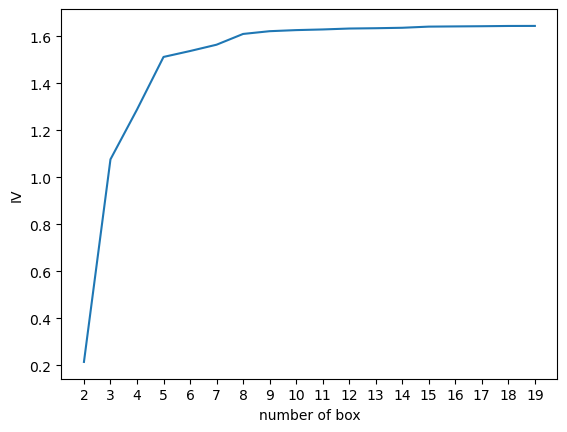

age


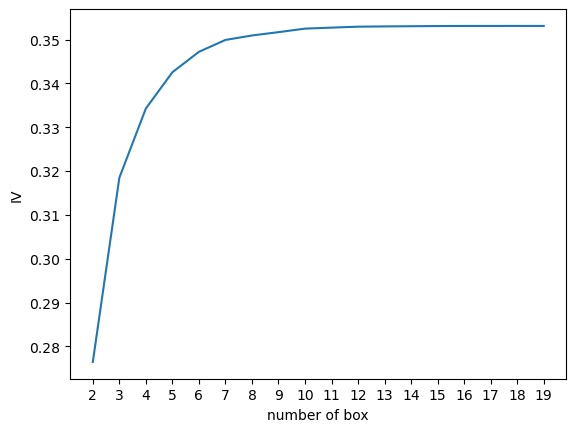

NumberOfTime30-59DaysPastDueNotWorse


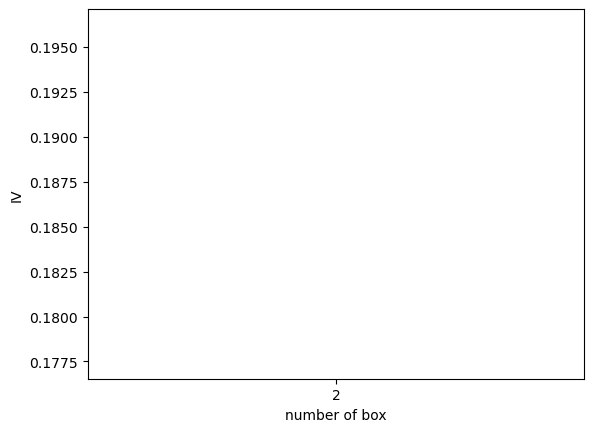

DebtRatio


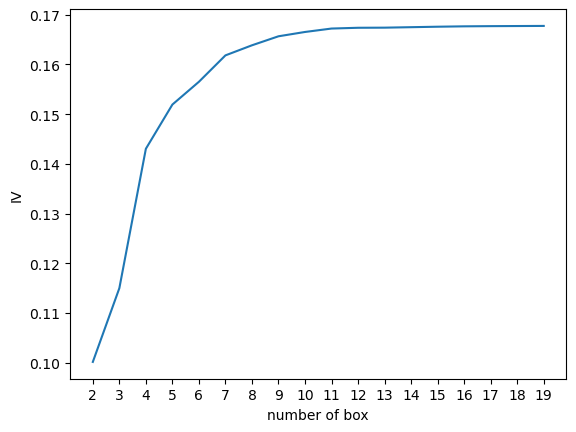

MonthlyIncome


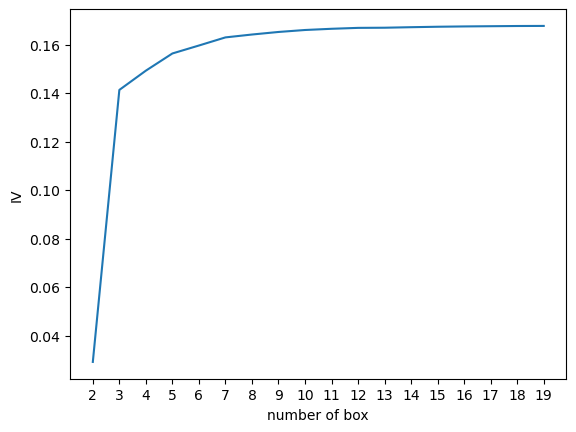

NumberOfOpenCreditLinesAndLoans


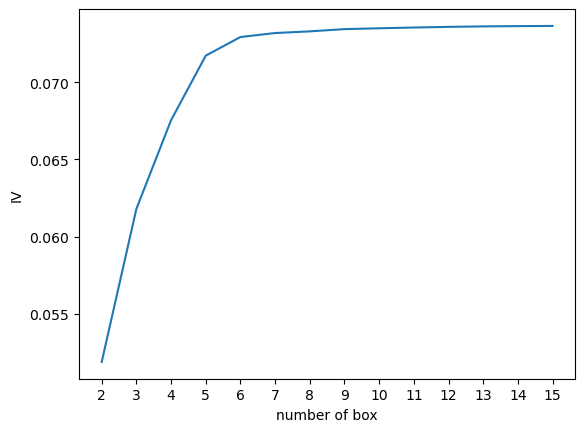

NumberOfTimes90DaysLate


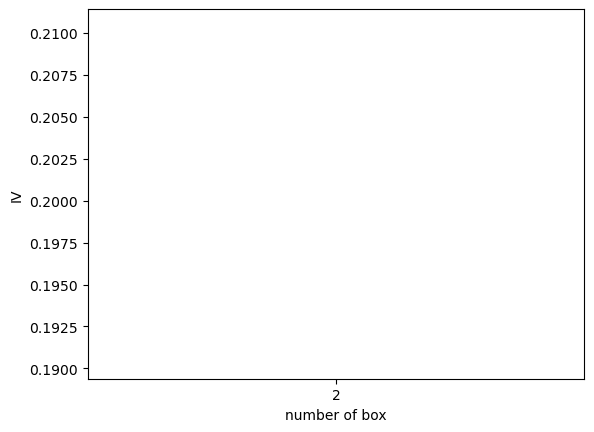

NumberRealEstateLoansOrLines


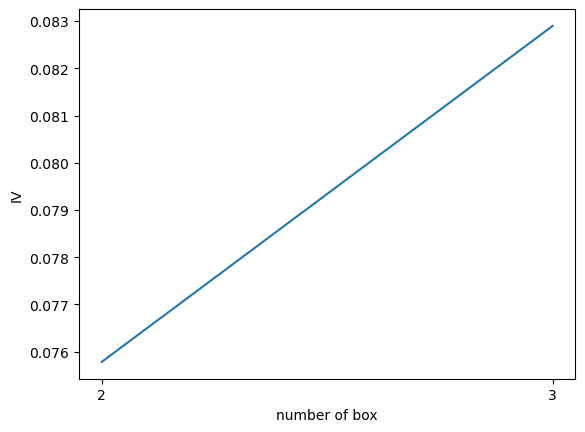

NumberOfTime60-89DaysPastDueNotWorse


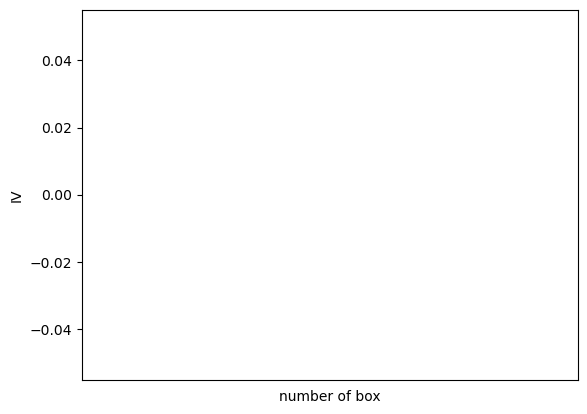

NumberOfDependents


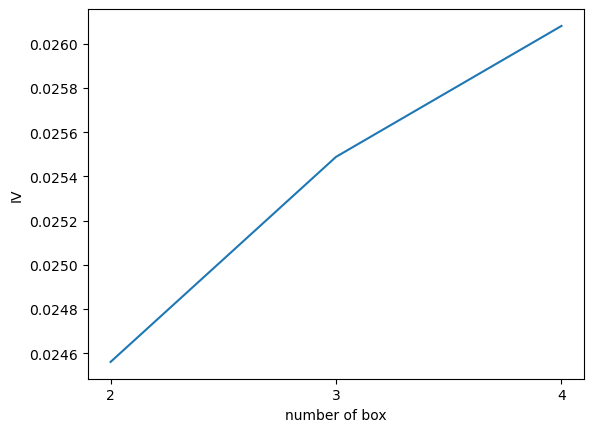

In [147]:

for i in model_data.columns[1:]:
    print(i) 
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

In [148]:
#对于不能自动分箱的要进行手动分箱
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [149]:
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 IV 值
 
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
#合并手动分箱数据    
bins_of_col.update(hand_bins)
 
bins_of_col#所有特征的分箱结果

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.099074332,
  0.2976756932613084,
  0.46487314286727166,
  0.9825371558248667,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017363747250000002,
  0.320711387943383,
  1.4717586788,
  inf],
 'MonthlyIncome': [-inf, 0.10418249959520126, 5597.6786135183065, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [150]:
# 计算各箱的WOE并映射到数据中
data = model_data.copy()
 
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
 
data["cut"] = pd.cut(data["age"],[-np.inf, 36.0, 54.0, 64.0, 74.0, np.inf])
 
data.head()


,age,SeriousDlqin2yrs,cut
0,53,0,"(36.0, 54.0]"
1,63,0,"(54.0, 64.0]"
2,39,1,"(36.0, 54.0]"
3,73,0,"(64.0, 74.0]"
4,53,1,"(36.0, 54.0]"


In [151]:

#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()
 


cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24826
              0                   14797
(36.0, 54.0]  1                   51430
              0                   39070
(54.0, 64.0]  0                   22711
              1                   15457
(64.0, 74.0]  0                   13376
              1                    4204
(74.0, inf]   0                    7737
              1                    1400
Name: SeriousDlqin2yrs, dtype: int64

In [152]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 


SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24826
"(36.0, 54.0]",39070,51430
"(54.0, 64.0]",22711,15457
"(64.0, 74.0]",13376,4204
"(74.0, inf]",7737,1400


In [153]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24826,-0.521303
"(36.0, 54.0]",39070,51430,-0.278702
"(54.0, 64.0]",22711,15457,0.380952
"(64.0, 74.0]",13376,4204,1.153590
"(74.0, inf]",7737,1400,1.705706


In [154]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [155]:
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0991]     2.202355
 (0.0991, 0.298]    0.665610
 (0.298, 0.465]    -0.126547
 (0.465, 0.983]    -1.072355
 (0.983, 1.0]      -0.477629
 (1.0, inf]        -2.035769
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.521303
 (36.0, 54.0]   -0.278702
 (54.0, 61.0]    0.245077
 (61.0, 74.0]    1.009229
 (74.0, inf]     1.705706
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0174]     1.506396
 (0.0174, 0.321]    0.074326
 (0.321, 1.472]    -0.313952
 (1.472, inf]       0.175299
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.104]        1.435342
 (0.104, 5597.679]   -0.238922
 (5597.679, inf]      0.233184
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.844035
 (1.0, 3.0]    -0.335796
 (3.0, 5.0]    -0.052904
 (5.0, 17.0]    0.124961
 (17.0, inf]    0.453549
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351950
 (0.0, 1.0]    -0.874349
 (1.0, 2.0]    -1.373741
 (2.0, inf]    -1.53

In [156]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
model_woe

""
0
1
2
3
4
...
195003
195004
195005
195006


In [157]:
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])


In [158]:
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])


In [159]:
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.278702,2.202355,0.074326,-0.238922,-0.052904,0.351950,0.236211,-0.393404,0.124198,0.656361,0
1,1.009229,0.665610,0.074326,-0.238922,-0.052904,0.351950,0.236211,-0.393404,0.124198,0.656361,0
2,-0.278702,-2.035769,-0.313952,-0.238922,-0.052904,-0.874349,-1.761168,-0.393404,-1.762639,-0.473649,1
3,1.009229,2.202355,-0.313952,-0.238922,0.124961,0.351950,0.236211,0.614916,0.124198,0.656361,0
4,-0.278702,-1.072355,-0.313952,0.233184,0.124961,0.351950,0.236211,0.614916,0.124198,-0.512876,1
...,...,...,...,...,...,...,...,...,...,...,...
195003,-0.521303,-1.072355,-0.313952,0.233184,0.124961,-1.373741,0.236211,0.194476,0.124198,-0.473649,1
195004,-0.278702,-1.072355,-0.313952,-0.238922,0.124961,-0.874349,0.236211,0.194476,0.124198,-0.531313,1
195005,-0.278702,-1.072355,-0.313952,0.233184,0.124961,0.351950,0.236211,0.194476,0.124198,-0.473649,1
195006,1.009229,-0.477629,-0.313952,0.233184,0.124961,0.351950,0.236211,0.399391,0.124198,0.656361,0


In [160]:
#建模
#处理测试集
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]


In [161]:

vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [162]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
 
from sklearn.linear_model import LogisticRegression as LR
 
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

e:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.7766942662965445

e:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
e:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
e:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
e:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an 

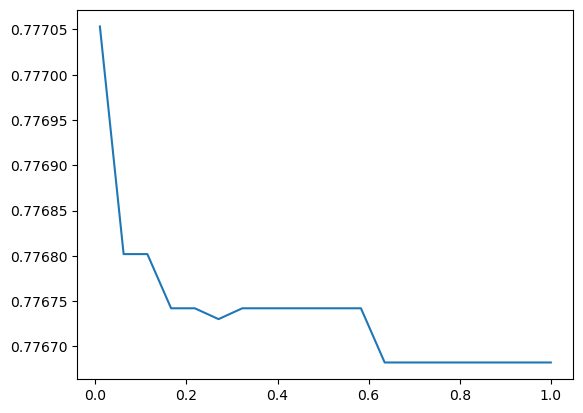

In [163]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
import matplotlib.pyplot as plt
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()


e:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
e:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
e:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the 

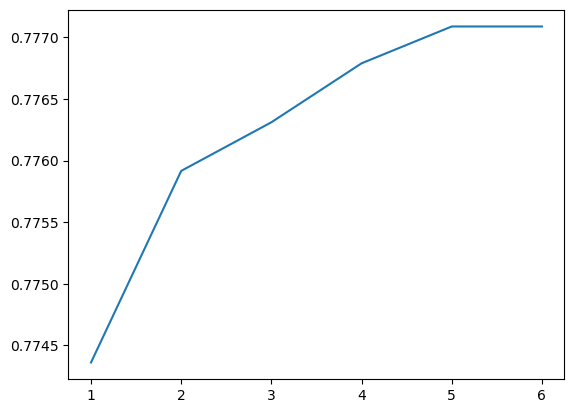

In [164]:

lr.n_iter_
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

e:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

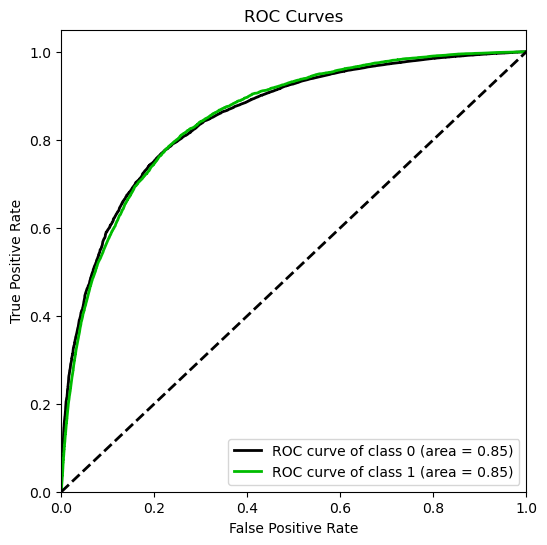

In [165]:
#绘制ROC曲线
import scikitplot as skplt
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

In [166]:
#制作评分卡
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数

cut
(-inf, 36.0]   -11.338190
(36.0, 54.0]    -6.061702
(54.0, 61.0]     5.330354
(61.0, 74.0]    21.950440
(74.0, inf]     37.098631
dtype: float64

In [168]:
file = "./ScoreData.csv"
 
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")